In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from math import sqrt
from sklearn import utils
from sklearn import metrics
from sklearn.model_selection import train_test_split, GroupKFold, KFold
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import csv

In [2]:
input_path = 'D:/vscode-projects/Python-projects/ML/final/allUsers.lcl.csv'
output_path = 'D:/vscode-projects/Python-projects/ML/final/mocap.csv'
file_data = []
# f = open(input_path, 'r')
# rows = csv.reader(f, delimiter=',')
# for row in rows:
#     if '?' not in row:
#         file_data.append(row)
# f.close()

with open(input_path, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')

    for row in reader:
        if '?' not in row:
            file_data.append(row)
#f.close()

with open(output_path, 'w', newline='') as csvfile:
  
    writer = csv.writer(csvfile)


    for id, row in enumerate(file_data):
        if id!=0 and id!=1 :
            writer.writerow(row)
#f.close()

In [3]:
output_path = 'D:/vscode-projects/Python-projects/ML/final/mocap.csv'
df = pd.read_csv(output_path, 
                 names = ['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
                 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4'], index_col='Class')  

users = df['User'].values
del df['User']
feature_names = df.columns.values
datas = df.values
datas = datas.astype('float64')
labels = df.index.values
labels -= 1


datas, labels, users = utils.shuffle(datas, labels, users, random_state=0)


[0 1 2 3 4]


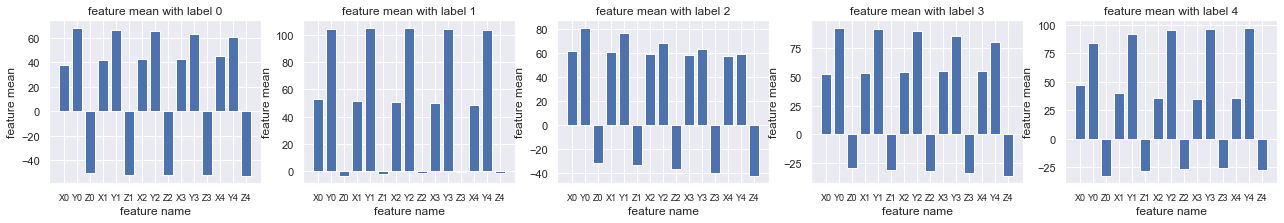

In [4]:
print(np.unique(labels))

labels_per_class = {0: [], 1: [], 2: [], 3: [], 4: []}
datas_per_class = {0: [], 1: [], 2: [], 3: [], 4: []}
users_per_class = {0: [], 1: [], 2: [], 3: [], 4: []}
total = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
for i in range(5):
    mask = [label in [i]
                      for label in labels]
    datas_per_class[i] = datas[mask, :] 
    users_per_class[i] = users[mask]
    labels_per_class[i] = labels[mask]

    
    total[i] = datas_per_class[i].shape[0]

plt.figure(figsize=(22,3))
for i in range(5):
    
    features_mean = datas_per_class[i].mean(axis=0)
    # print(features_mean.shape)
    
    subplot_num = 151+i
    plt.subplot(subplot_num)
    plt.bar(feature_names, features_mean)
    plt.xticks(np.arange(len(feature_names)), feature_names, fontsize=9)
    plt.xlabel('feature name')
    plt.ylabel('feature mean')
    plt.title('feature mean with label ' + str(i))

plt.show() 


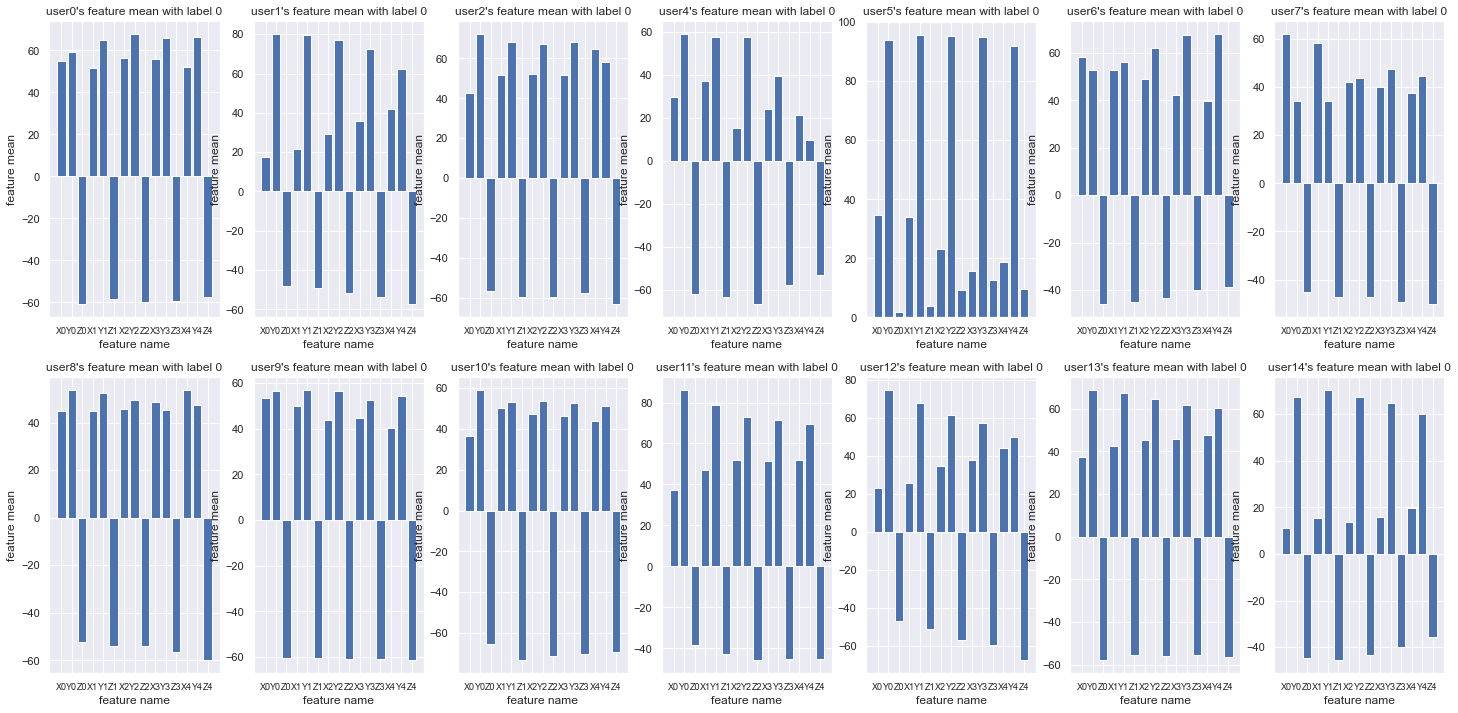

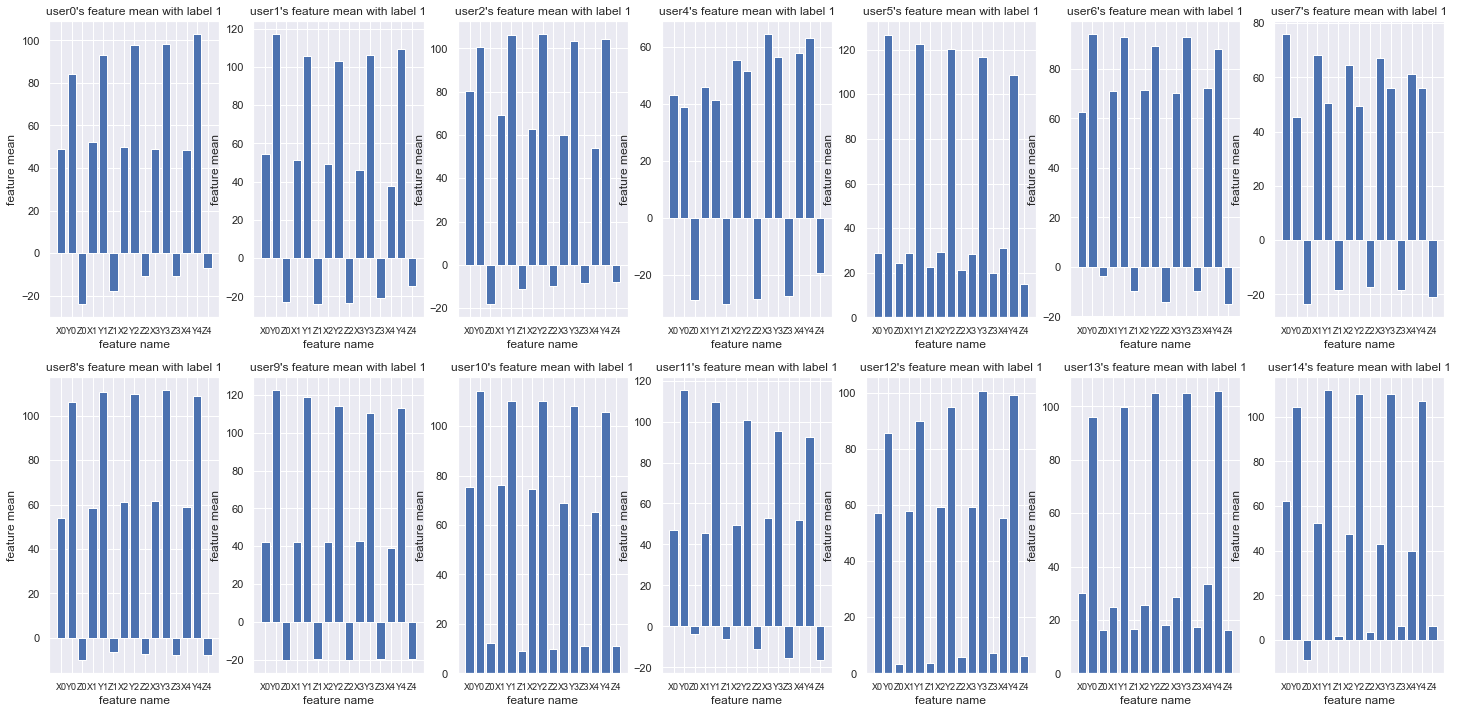

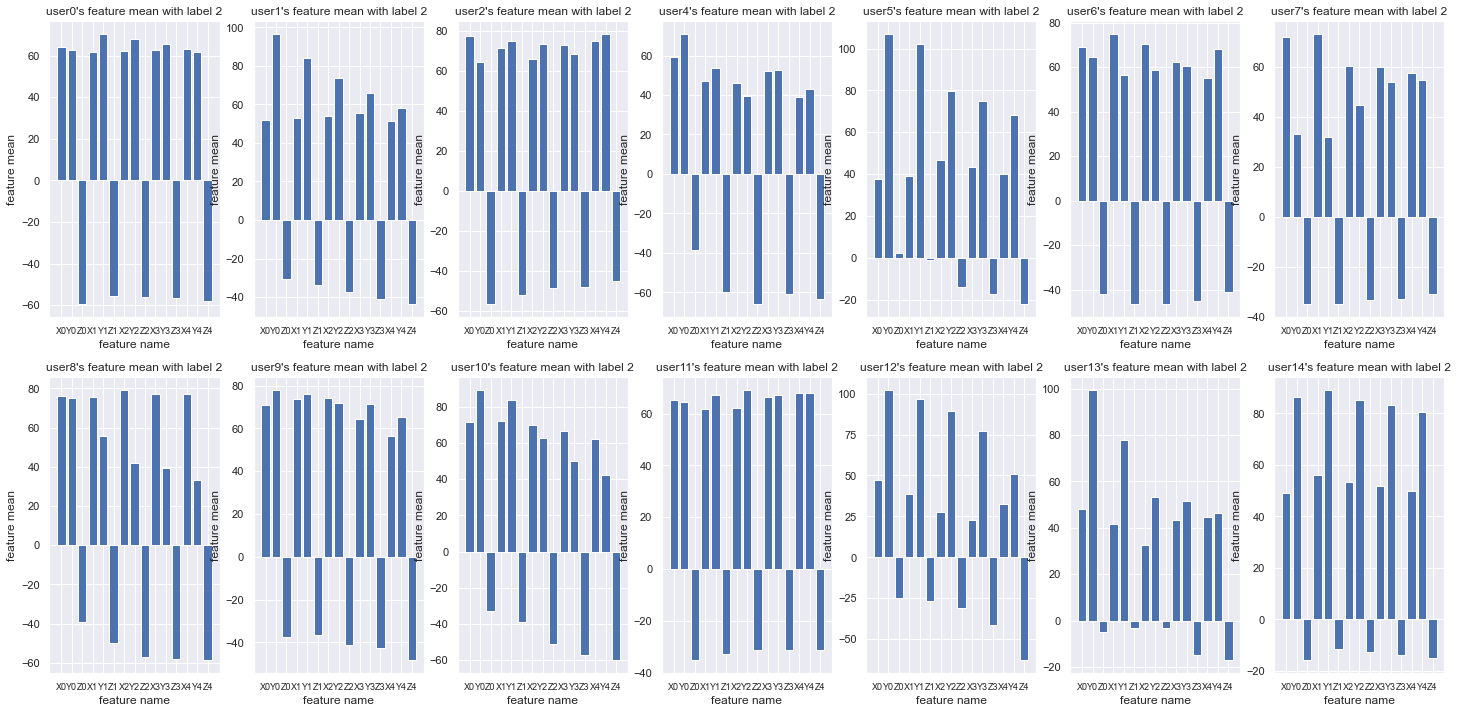

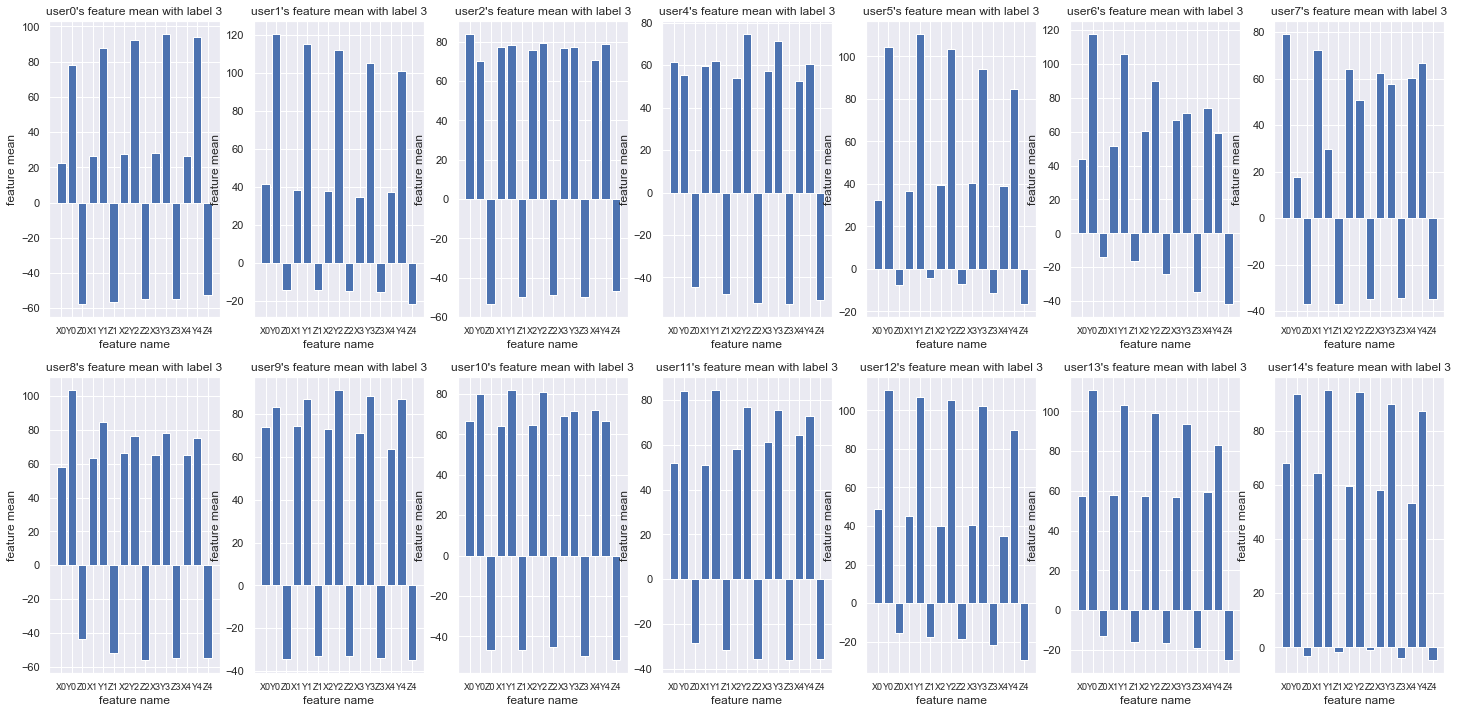

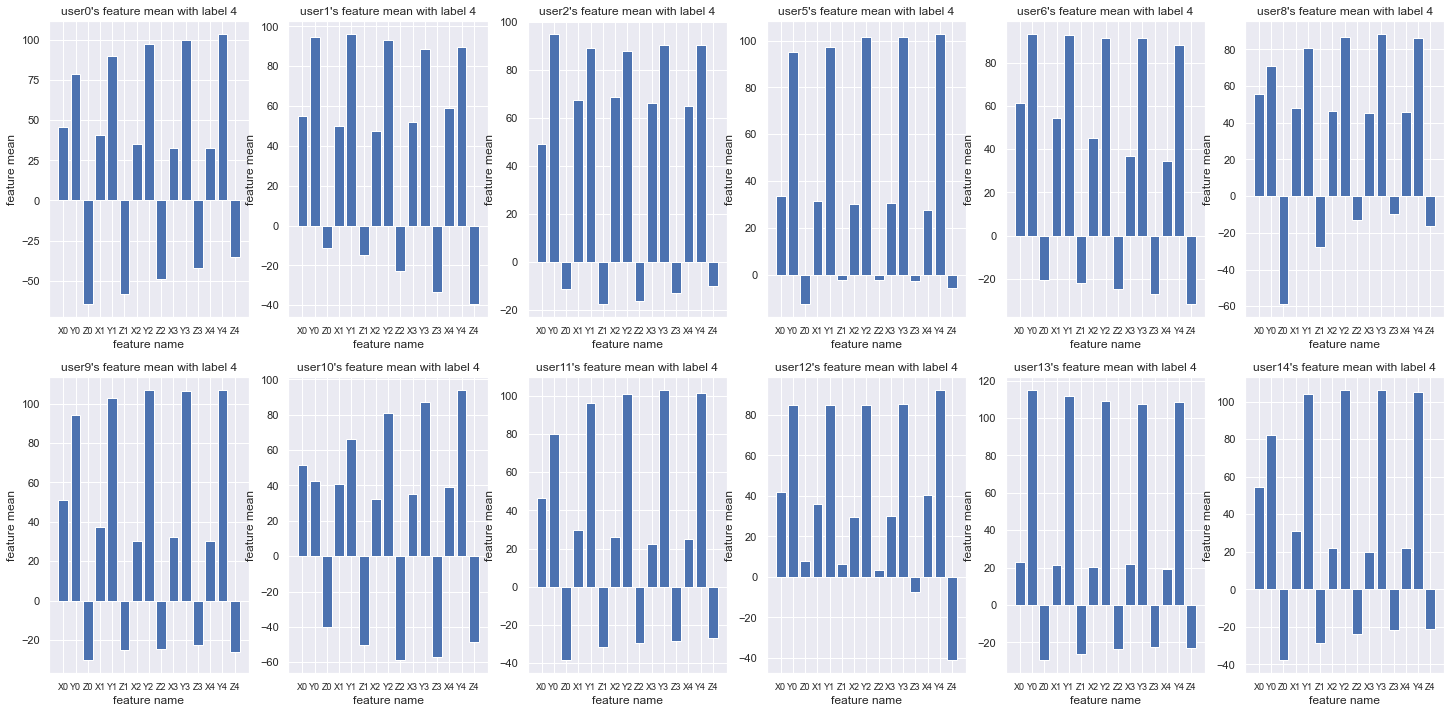

In [156]:
# print(np.unique(users_mask[0]))

colors = ['#ffdee0', '#f3f3cd', '#d1f4b7', '#ddf3ff', '#e3d9ff']
for i in range(5):                                              # each label
    unique_users = np.unique(users_per_class[i])  
    plt.figure(figsize=(25,12))   
    for id, user in enumerate(unique_users): 
                           # each user
        user_mask = [u in [user]
                        for u in users_per_class[i]]
        user_data = datas_per_class[i][user_mask, :] 
        
        feature_mean = user_data.mean(axis=0)
        plt.subplot(2, int(len(unique_users)/2), id+1)
        # plt.bar(feature_names, feature_mean, color=colors[i])
        plt.bar(feature_names, feature_mean)
        plt.xticks(np.arange(len(feature_names)), feature_names, fontsize=9)
        plt.xlabel('feature name')
        plt.ylabel('feature mean')
        plt.title('user' + str(user) + '\'s feature mean with label ' + str(i))
    plt.show()


In [6]:
def train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels): 
    model.fit(train_datas, train_labels)
    predicts = model.predict(validate_datas)
    mat.append(confusion_matrix(validate_labels, predicts))

    precision.append(metrics.precision_score(validate_labels, predicts, average=None))
    recall.append(metrics.recall_score(validate_labels, predicts, average=None))
    accuracy.append(metrics.accuracy_score(validate_labels, predicts))

def test(model, test_datas, test_labels):
    predicts = model.predict(test_datas)
    mat = confusion_matrix(test_labels, predicts)
    precision = metrics.precision_score(test_labels, predicts, average=None)
    recall = metrics.recall_score(test_labels, predicts, average=None)
    accuracy = metrics.accuracy_score(test_labels, predicts)

    return mat, precision, recall, accuracy
    
def average_performance(precision, recall, accuracy, mat):

    #print(np.array(precision).shape, np.array(recall).shape, np.array(accuracy).shape, np.array(mat).shape)
    # print(precision)
    precision = np.mean(precision, axis=0)
    recall = np.mean(recall, axis=0)
    accuracy = np.mean(accuracy, axis=0)
    mat = np.mean(mat, axis = 0)

    return precision, recall, accuracy, mat
    
def plot_confusion_matrix(mat, title, xyticklabels, pos=None):
    if pos != None:
        plt.subplot(pos)
    sns.heatmap(mat.T, square=True, annot=True, fmt='.2f', cbar=False,
                xticklabels=xyticklabels, yticklabels=xyticklabels)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title(title)  
def plot_performance(precision, recall, accuracy, index):
    df = list(zip(precision, recall)) 
    table = pd.DataFrame( df, index,
        columns=['Precision', 'Recall'])
    print(table)
    print('accuracy      {:.6f}'.format(accuracy))

In [7]:

user_seperation = False
labels_per_class_for_train = {0: [], 1: [], 2: [], 3: [], 4: []}
datas_per_class_for_train = {0: [], 1: [], 2: [], 3: [], 4: []}
users_per_class_for_train = {0: [], 1: [], 2: [], 3: [], 4: []}
labels_per_class_for_test = {0: [], 1: [], 2: [], 3: [], 4: []}
datas_per_class_for_test = {0: [], 1: [], 2: [], 3: [], 4: []}
users_per_class_for_test = {0: [], 1: [], 2: [], 3: [], 4: []}
for i in range(5):
    datas_per_class_for_train[i], datas_per_class_for_test[i], labels_per_class_for_train[i], labels_per_class_for_test[i], users_per_class_for_train[i], users_per_class_for_test[i] = train_test_split(datas_per_class[i], labels_per_class[i], users_per_class[i], test_size=0.1, random_state=0)

# split data
if user_seperation==False:  
    datas_for_train, datas_for_test, labels_for_train, labels_for_test, users_for_train, users_for_test = train_test_split(datas, labels, users, test_size=0.1, random_state=1)
    
    
else:
    # seperate user 14
    # user 14 for test
    # other user for train
    user14_mask = np.array([user in [14]
                      for user in users])
    datas_for_test = datas[user14_mask, :] 
    labels_for_test = labels[user14_mask]
    users_for_test = np.array([14]*labels_for_test.shape[0])
    datas_for_train = datas[~user14_mask, :] 
    labels_for_train = labels[~user14_mask] 
    users_for_train = users[~user14_mask] 


    # for i in range(5):
    #     user14_label_mask = [label in [i]
    #                     for label in labels_for_test]
    #     not_user14_label_mask = [label in [i]
    #                     for label in labels_for_train]

    #     labels_per_class_for_train[i] = labels_for_train[not_user14_label_mask]
    #     datas_per_class_for_train[i] =  datas_for_train[not_user14_label_mask, :]
    #     users_per_class_for_train[i] = users_for_train[not_user14_label_mask]
    #     labels_per_class_for_test[i] = labels_for_test[user14_label_mask]
    #     datas_per_class_for_test[i] = datas_for_test[user14_label_mask]
    #     users_per_class_for_test[i] = np.array([14]*labels_per_class_for_test[i].shape[0])

    #     # print(datas_for_train.shape, datas_for_test.shape, labels_for_train.shape, labels_for_test.shape, users_for_train.shape, users_for_test.shape)



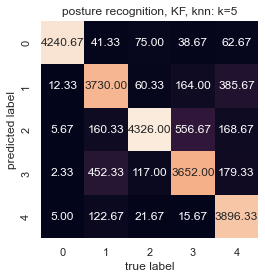

   Precision    Recall
0   0.951197  0.994057
1   0.857019  0.827673
2   0.829113  0.940425
3   0.829429  0.824938
4   0.959377  0.830285
accuracy      0.882301


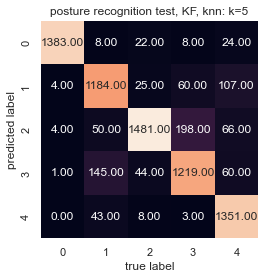

   Precision    Recall
0   0.957093  0.993534
1   0.857971  0.827972
2   0.823235  0.937342
3   0.829816  0.819220
4   0.961566  0.840174
accuracy      0.882635


In [167]:
# poseture classfification, Kfold, KNN
kf = KFold(n_splits=3)

model = KNeighborsClassifier(n_neighbors=5)
precision = []
recall = []
accuracy = []
mat = []
for train_index, validate_index in kf.split(datas_for_train):
    train_datas, validate_datas = datas_for_train[train_index], datas_for_train[validate_index]
    train_labels, validate_labels = labels_for_train[train_index], labels_for_train[validate_index]
    train_users, validate_users = users_for_train[train_index], users_for_train[validate_index]

    # print(np.unique(train_users))
    # print(np.unique(test_users))
    
    train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)


# print(precision, precision, recall, accuracy, mat)
precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

plot_confusion_matrix(mat, 'posture recognition, KF, knn: k=5', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

# test
mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
plot_confusion_matrix(mat, 'posture recognition test, KF, knn: k=5', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

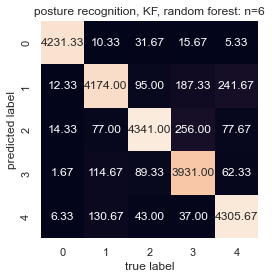

   Precision    Recall
0   0.985333  0.991873
1   0.886178  0.926190
2   0.910815  0.943672
3   0.936164  0.887964
4   0.952006  0.917507
accuracy      0.932896


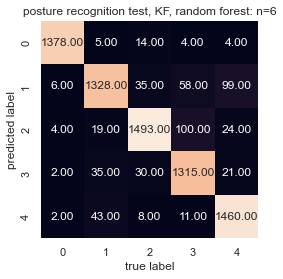

   Precision    Recall
0   0.980783  0.989943
1   0.870249  0.928671
2   0.910366  0.944937
3   0.937277  0.883737
4   0.958005  0.907960
accuracy      0.930115


In [168]:
# poseture classfification, Kfold, random forest
kf = KFold(n_splits=3)

model = RandomForestClassifier(n_estimators = 6, random_state = 0)
precision = []
recall = []
accuracy = []
mat = []
unique_train_user = []
for train_index, validate_index in kf.split(datas_for_train):
    train_datas, validate_datas = datas_for_train[train_index], datas_for_train[validate_index]
    train_labels, validate_labels = labels_for_train[train_index], labels_for_train[validate_index]
    train_users, validate_users = users_for_train[train_index], users_for_train[validate_index]
    unique_train_user.append(np.unique(train_users))
    # print(np.unique(train_users))
    # print(np.unique(test_users))
    
    train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)


# print(precision, precision, recall, accuracy, mat)
precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

plot_confusion_matrix(mat, 'posture recognition, KF, random forest: n=6', [0, 1, 2, 3, 4])
plt.show()

plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])


# test
mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
plot_confusion_matrix(mat, 'posture recognition test, KF, random forest: n=6', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

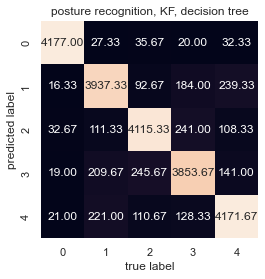

   Precision    Recall
0   0.973140  0.979126
1   0.880884  0.873657
2   0.892906  0.894638
3   0.862322  0.870540
4   0.896618  0.888969
accuracy      0.900529


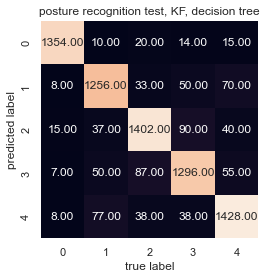

   Precision    Recall
0   0.958245  0.972701
1   0.886380  0.878322
2   0.885101  0.887342
3   0.866890  0.870968
4   0.898678  0.888060
accuracy      0.898373


In [169]:
# poseture classfification, Kfold, decision tree
kf = KFold(n_splits=3)

model = tree.DecisionTreeClassifier()
precision = []
recall = []
accuracy = []
mat = []
unique_train_user = []
for train_index, validate_index in kf.split(datas_for_train):
    train_datas, validate_datas = datas_for_train[train_index], datas_for_train[validate_index]
    train_labels, validate_labels = labels_for_train[train_index], labels_for_train[validate_index]
    train_users, validate_users = users_for_train[train_index], users_for_train[validate_index]
    unique_train_user.append(np.unique(train_users))
    # print(np.unique(train_users))
    # print(np.unique(test_users))
    
    train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)


# print(precision, precision, recall, accuracy, mat)
precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

plot_confusion_matrix(mat, 'posture recognition, KF, decision tree', [0, 1, 2, 3, 4])
plt.show()

plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])


# test
mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
plot_confusion_matrix(mat, 'posture recognition test, KF, decision tree', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


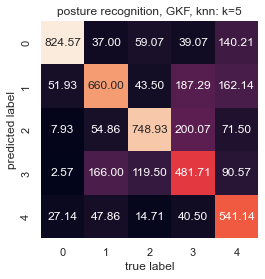

   Precision    Recall
0   0.693500  0.872942
1   0.668941  0.605481
2   0.649579  0.749739
3   0.598669  0.478560
4   0.674315  0.479566
accuracy      0.633517


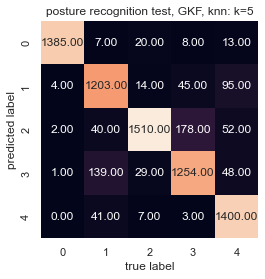

   Precision    Recall
0   0.966504  0.994971
1   0.883909  0.841259
2   0.847363  0.955696
3   0.852481  0.842742
4   0.964852  0.870647
accuracy      0.900507


In [170]:
# poseture classfification, GroupKFold

if user_seperation==False: 
    gkf = GroupKFold(n_splits=14)
else:
    gkf = GroupKFold(n_splits=13)

model = KNeighborsClassifier(n_neighbors=5)
# model = RandomForestClassifier(n_estimators = 6, random_state = 0)
precision = []
recall = []
accuracy = []
mat = []
for train_index, validate_index in gkf.split(datas_for_train, groups=users_for_train):
    train_datas, validate_datas = datas_for_train[train_index], datas_for_train[validate_index]
    train_labels, validate_labels = labels_for_train[train_index], labels_for_train[validate_index]
    train_users, validate_users = users_for_train[train_index], users_for_train[validate_index]

    # print(np.unique(train_users))
    # print(np.unique(test_users))
    
    train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)


# print(precision, precision, recall, accuracy, mat)
precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

plot_confusion_matrix(mat, 'posture recognition, GKF, knn: k=5', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

# test
mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
plot_confusion_matrix(mat, 'posture recognition test, GKF, knn: k=5', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


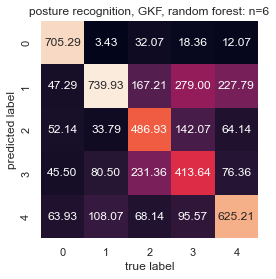

   Precision    Recall
0   0.774180  0.770738
1   0.546943  0.697918
2   0.578662  0.532384
3   0.518129  0.400136
4   0.561703  0.531769
accuracy      0.585680


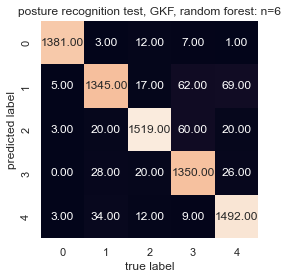

   Precision    Recall
0   0.983618  0.992098
1   0.897864  0.940559
2   0.936498  0.961392
3   0.948034  0.907258
4   0.962581  0.927861
accuracy      0.945185


In [171]:
# poseture classfification, GroupKFold
if user_seperation==False: 
    gkf = GroupKFold(n_splits=14)
else:
    gkf = GroupKFold(n_splits=13)

model = RandomForestClassifier(n_estimators = 6, random_state = 0)
precision = []
recall = []
accuracy = []
mat = []
for train_index, validate_index in gkf.split(datas_for_train, groups=users_for_train):
    train_datas, validate_datas = datas_for_train[train_index], datas_for_train[validate_index]
    train_labels, validate_labels = labels_for_train[train_index], labels_for_train[validate_index]
    train_users, validate_users = users_for_train[train_index], users_for_train[validate_index]

    # print(np.unique(train_users))
    # print(np.unique(test_users))
    
    train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)


# print(precision, precision, recall, accuracy, mat)
precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

plot_confusion_matrix(mat, 'posture recognition, GKF, random forest: n=6', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

# test
mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
plot_confusion_matrix(mat, 'posture recognition test, GKF, random forest: n=6', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


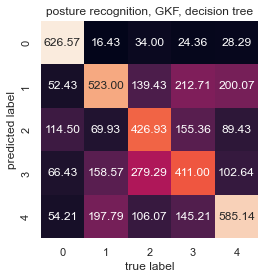

   Precision    Recall
0   0.745817  0.683827
1   0.483535  0.496715
2   0.456011  0.456542
3   0.415388  0.407747
4   0.465664  0.490051
accuracy      0.507503


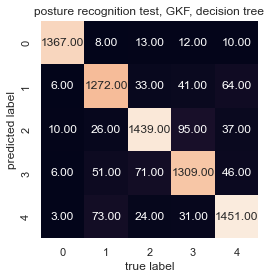

   Precision    Recall
0   0.969504  0.982040
1   0.898305  0.889510
2   0.895457  0.910759
3   0.882670  0.879704
4   0.917193  0.902363
accuracy      0.911977


In [172]:
# poseture classfification, GroupKFold, decision tree
if user_seperation==False: 
    gkf = GroupKFold(n_splits=14)
else:
    gkf = GroupKFold(n_splits=13)

model = tree.DecisionTreeClassifier()
precision = []
recall = []
accuracy = []
mat = []
for train_index, validate_index in gkf.split(datas_for_train, groups=users_for_train):
    train_datas, validate_datas = datas_for_train[train_index], datas_for_train[validate_index]
    train_labels, validate_labels = labels_for_train[train_index], labels_for_train[validate_index]
    train_users, validate_users = users_for_train[train_index], users_for_train[validate_index]

    # print(np.unique(train_users))
    # print(np.unique(test_users))
    
    train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)


precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

plot_confusion_matrix(mat, 'posture recognition, GKF, decision tree', [0, 1, 2, 3, 4])
plt.show()

plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])


# test
mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
plot_confusion_matrix(mat, 'posture recognition test, GKF, decision tree', [0, 1, 2, 3, 4])
plt.show()
plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 4])

C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


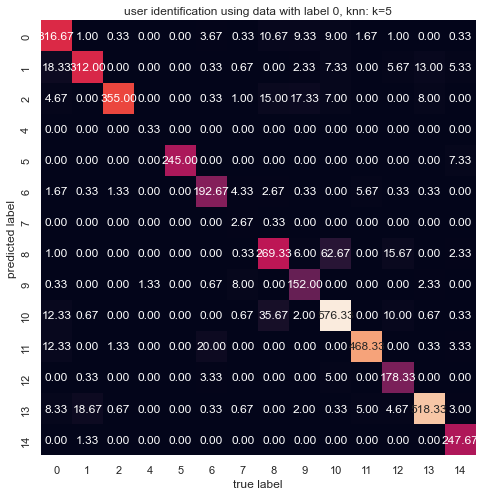

    Precision    Recall
0    0.894845  0.843347
1    0.855162  0.933223
2    0.868717  0.989968
4    0.333333  0.166667
5    0.969476  1.000000
6    0.918940  0.871228
7    0.888889  0.140246
8    0.754030  0.806795
9    0.923380  0.794920
10   0.902257  0.863383
11   0.926399  0.974330
12   0.953876  0.826840
13   0.922095  0.955534
14   0.995062  0.918158
accuracy      0.900791


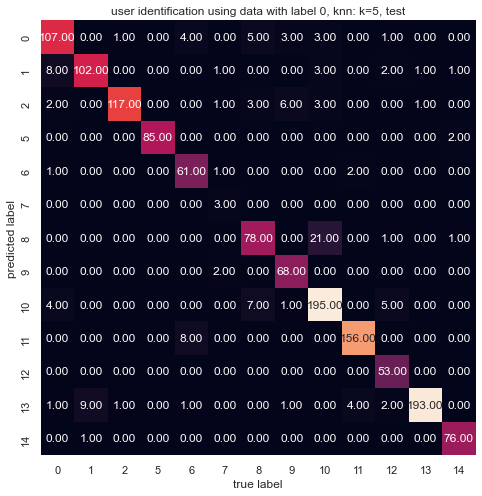

    Precision    Recall
0    0.862903  0.869919
1    0.864407  0.910714
2    0.879699  0.983193
5    0.977011  1.000000
6    0.938462  0.824324
7    1.000000  0.375000
8    0.772277  0.838710
9    0.971429  0.860759
10   0.919811  0.866667
11   0.951220  0.962963
12   1.000000  0.828125
13   0.910377  0.989744
14   0.987013  0.950000
accuracy      0.911910


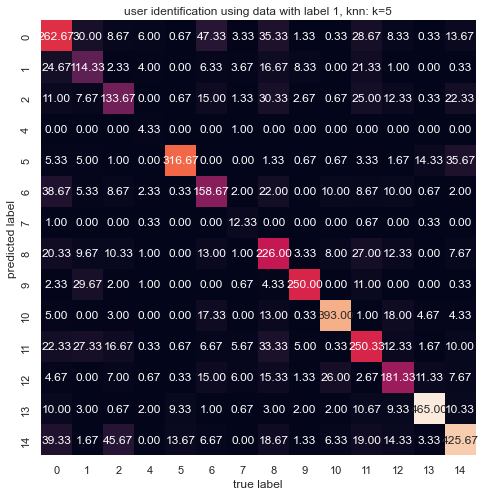

    Precision    Recall
0    0.586889  0.585878
1    0.563705  0.488777
2    0.505376  0.555255
4    0.849206  0.196692
5    0.820722  0.924965
6    0.590026  0.554975
7    0.846732  0.332548
8    0.663864  0.537870
9    0.829043  0.904750
10   0.856086  0.878777
11   0.637329  0.611667
12   0.648502  0.644998
13   0.879181  0.926639
14   0.714631  0.787840
accuracy      0.712152


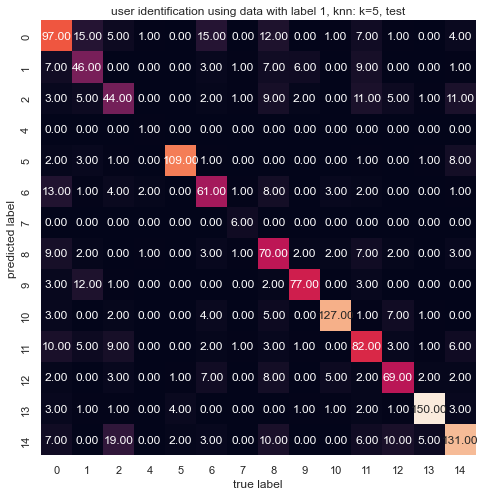

    Precision    Recall
0    0.613924  0.610063
1    0.575000  0.511111
2    0.468085  0.494382
4    1.000000  0.200000
5    0.865079  0.939655
6    0.635417  0.603960
7    1.000000  0.545455
8    0.686275  0.522388
9    0.785714  0.865169
10   0.846667  0.913669
11   0.666667  0.616541
12   0.683168  0.704082
13   0.898204  0.931677
14   0.678756  0.770588
accuracy      0.715719


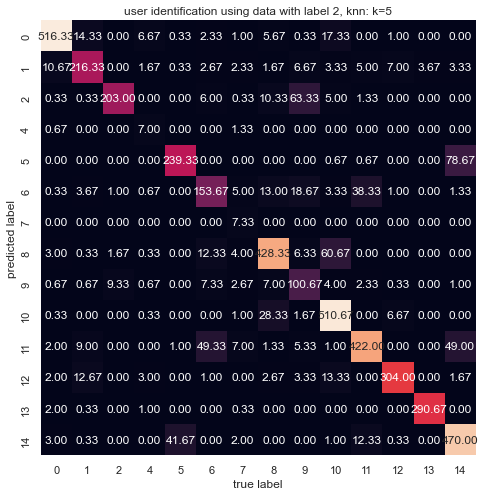

    Precision    Recall
0    0.913859  0.953888
1    0.817407  0.838578
2    0.699820  0.944121
4    0.784091  0.341844
5    0.751898  0.847234
6    0.638724  0.652289
7    1.000000  0.214006
8    0.828654  0.859608
9    0.736084  0.487787
10   0.930137  0.823206
11   0.771722  0.876291
12   0.884544  0.949238
13   0.987547  0.987792
14   0.885629  0.777915
accuracy      0.838607


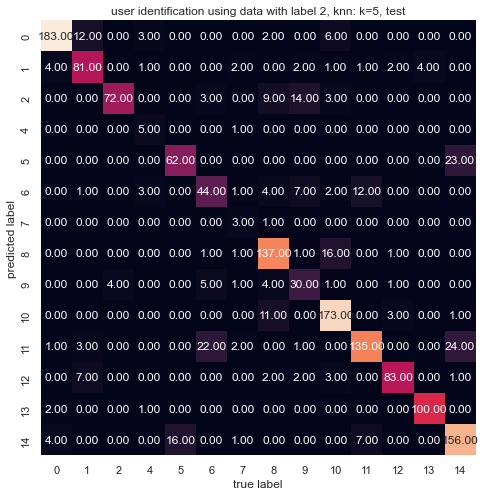

    Precision    Recall
0    0.888350  0.943299
1    0.826531  0.778846
2    0.712871  0.947368
4    0.833333  0.384615
5    0.729412  0.794872
6    0.594595  0.586667
7    0.750000  0.250000
8    0.872611  0.805882
9    0.652174  0.526316
10   0.920213  0.843902
11   0.718085  0.870968
12   0.846939  0.922222
13   0.970874  0.961538
14   0.847826  0.760976
accuracy      0.821847


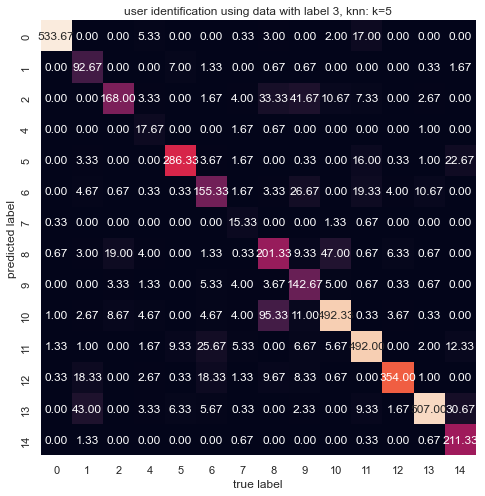

    Precision    Recall
0    0.950793  0.993208
1    0.888304  0.545745
2    0.616268  0.841587
4    0.837778  0.396649
5    0.854451  0.924793
6    0.684398  0.696068
7    0.873559  0.378451
8    0.685859  0.573750
9    0.852424  0.570102
10   0.782621  0.871291
11   0.874083  0.872853
12   0.853205  0.955895
13   0.831628  0.960242
14   0.985886  0.759048
accuracy      0.828243


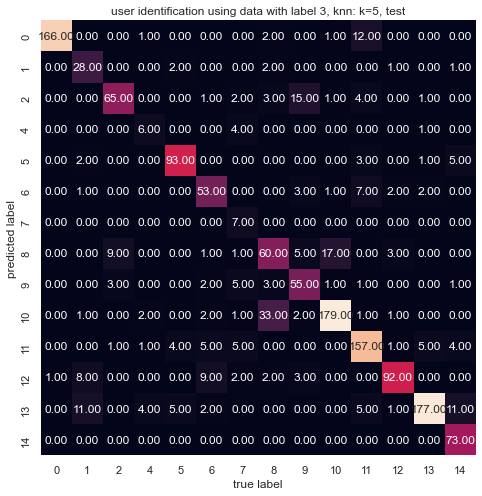

    Precision    Recall
0    0.912088  0.994012
1    0.823529  0.549020
2    0.706522  0.833333
4    0.545455  0.428571
5    0.894231  0.894231
6    0.768116  0.706667
7    1.000000  0.259259
8    0.625000  0.571429
9    0.774648  0.662651
10   0.806306  0.895000
11   0.857923  0.826316
12   0.786325  0.910891
13   0.819444  0.946524
14   1.000000  0.768421
accuracy      0.819905


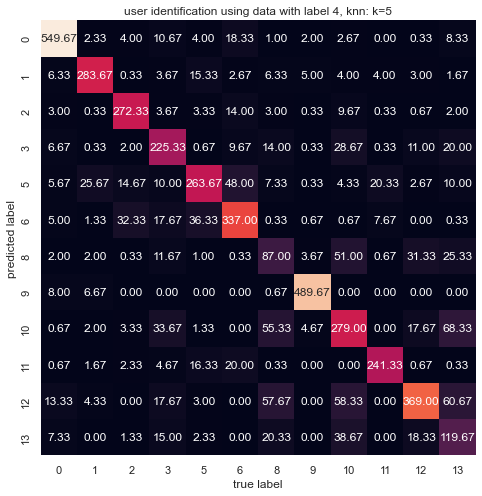

    Precision    Recall
0    0.911088  0.903456
1    0.843949  0.858579
2    0.870863  0.817588
3    0.706300  0.636807
5    0.638826  0.758865
6    0.767181  0.748830
8    0.401632  0.344332
9    0.969621  0.966615
10   0.598760  0.584968
11   0.836945  0.878856
12   0.632007  0.811621
13   0.540591  0.377707
accuracy      0.747468


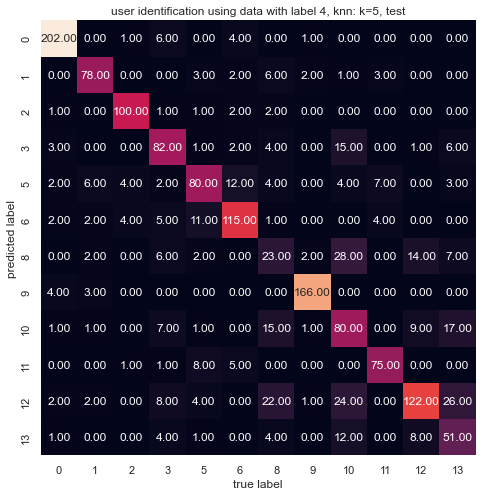

    Precision    Recall
0    0.943925  0.926606
1    0.821053  0.829787
2    0.934579  0.909091
3    0.719298  0.672131
5    0.645161  0.714286
6    0.798611  0.809859
8    0.273810  0.283951
9    0.959538  0.959538
10   0.606061  0.487805
11   0.833333  0.842697
12   0.578199  0.792208
13   0.629630  0.463636
accuracy      0.748247


In [26]:
# user identification
for i in range(0, 5):
    kf = KFold(n_splits=3)
    # print(np.unique(users_per_class[i]))
    model = KNeighborsClassifier(n_neighbors=5)
    precision = []
    recall = []
    accuracy = []
    mat = []
    
    for train_index, validate_index in kf.split(datas_per_class_for_train[i]):
        train_datas, validate_datas = datas_per_class_for_train[i][train_index], datas_per_class_for_train[i][validate_index]
        train_labels, validate_labels = users_per_class_for_train[i][train_index], users_per_class_for_train[i][validate_index]

        # num = 0
        # for j in range(validate_labels.shape[0]):
        #     if(validate_labels[j]==4):
        #         num+=1
        # print(num)
        
        train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)
    

    precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

    plt.figure(figsize=(8,8))
    if i==4: 
        plot_confusion_matrix(mat, 'user identification using data with label 4, knn: k=5', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        plt.show()

        # # test
        # mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
        # plot_confusion_matrix(mat, 'test user identification using data with label 4, knn: k=5', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        # plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    else:
        plot_confusion_matrix(mat, 'user identification using data with label '+str(i)+', knn: k=5', [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    plt.show()

    if i==4:
        plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    else: 
        plot_performance(precision, recall, accuracy, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])


    # test
    plt.figure(figsize=(8,8))
    if i==4: 
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        plot_confusion_matrix(mat, 'user identification using data with label 4, knn: k=5, test', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    elif i==0:
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        
        plot_confusion_matrix(mat, 'user identification using data with label 0, knn: k=5, test', [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

    else:
        
    
        
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        
        plot_confusion_matrix(mat, 'user identification using data with label '+str(i)+', knn: k=5, test', [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


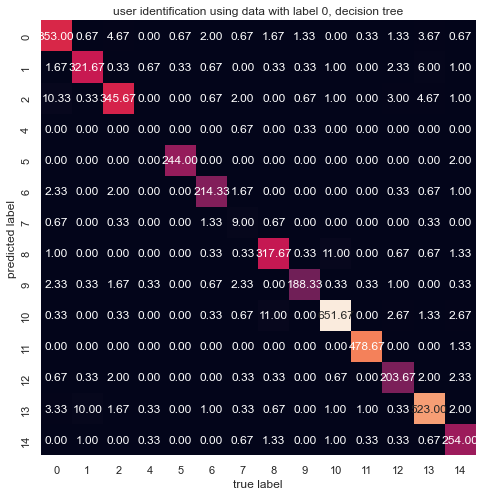

    Precision    Recall
0    0.952634  0.939995
1    0.956492  0.962158
2    0.937106  0.964306
4    0.000000  0.000000
5    0.990950  0.995675
6    0.964003  0.968580
7    0.730769  0.489923
8    0.953431  0.952044
9    0.951977  0.984052
10   0.971336  0.975948
11   0.997238  0.995833
12   0.959540  0.944277
13   0.959981  0.962699
14   0.978160  0.941855
accuracy      0.964216


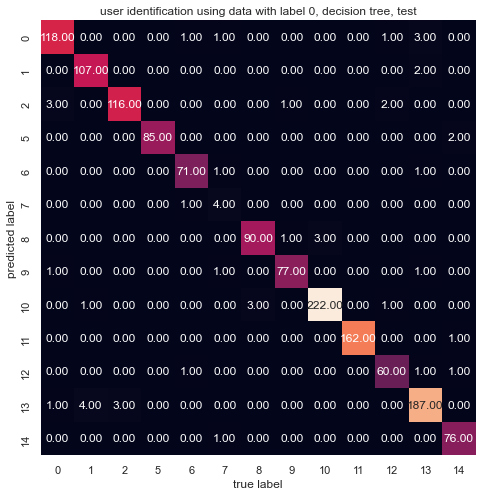

    Precision    Recall
0    0.951613  0.959350
1    0.981651  0.955357
2    0.950820  0.974790
5    0.977011  1.000000
6    0.972603  0.959459
7    0.800000  0.500000
8    0.957447  0.967742
9    0.962500  0.974684
10   0.977974  0.986667
11   0.993865  1.000000
12   0.952381  0.937500
13   0.958974  0.958974
14   0.987013  0.950000
accuracy      0.968992


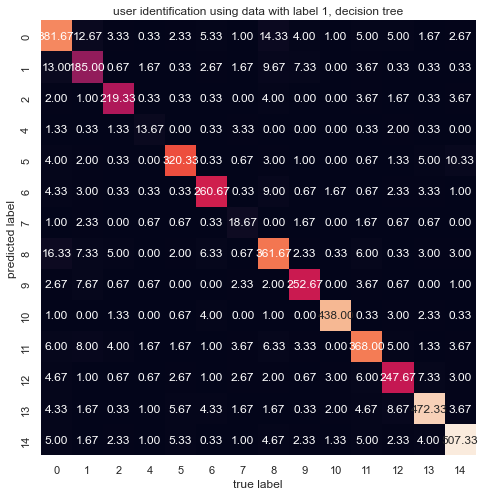

    Precision    Recall
0    0.866350  0.853054
1    0.814731  0.789517
2    0.929112  0.914881
4    0.594534  0.640231
5    0.918597  0.935601
6    0.905218  0.909120
7    0.666574  0.498049
8    0.872743  0.862663
9    0.921346  0.914444
10   0.968858  0.979131
11   0.889409  0.898790
12   0.875125  0.881138
13   0.921090  0.940733
14   0.933671  0.939517
accuracy      0.902341


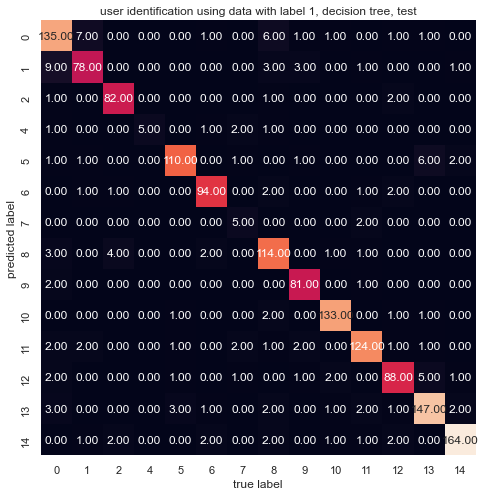

    Precision    Recall
0    0.882353  0.849057
1    0.821053  0.866667
2    0.953488  0.921348
4    0.500000  1.000000
5    0.901639  0.948276
6    0.930693  0.930693
7    0.714286  0.454545
8    0.912000  0.850746
9    0.964286  0.910112
10   0.963768  0.956835
11   0.911765  0.932331
12   0.871287  0.897959
13   0.907407  0.913043
14   0.937143  0.964706
accuracy      0.909699


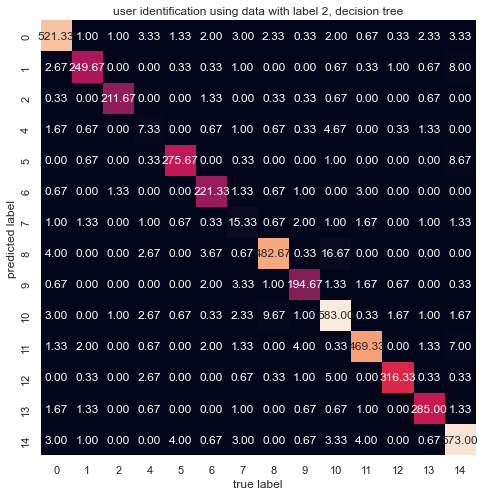

    Precision    Recall
0    0.957697  0.962846
1    0.943924  0.967696
2    0.982978  0.985073
4    0.415783  0.357717
5    0.961768  0.975346
6    0.965752  0.943038
7    0.561484  0.445658
8    0.945148  0.968521
9    0.946098  0.943266
10   0.958265  0.939844
11   0.959301  0.973787
12   0.967294  0.987348
13   0.971124  0.968228
14   0.966025  0.947788
accuracy      0.954992


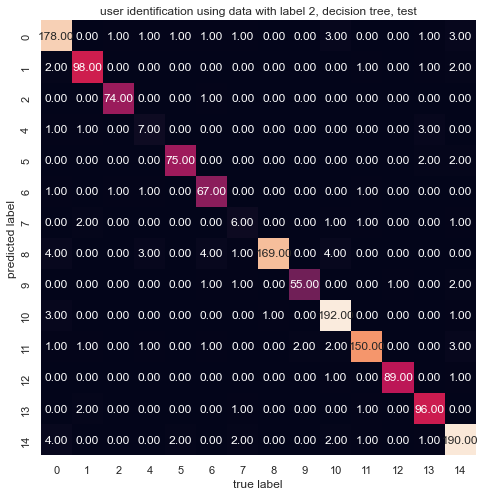

    Precision    Recall
0    0.936842  0.917526
1    0.942308  0.942308
2    0.986667  0.973684
4    0.583333  0.538462
5    0.949367  0.961538
6    0.943662  0.893333
7    0.545455  0.500000
8    0.913514  0.994118
9    0.916667  0.964912
10   0.974619  0.936585
11   0.931677  0.967742
12   0.978022  0.988889
13   0.960000  0.923077
14   0.940594  0.926829
accuracy      0.940182


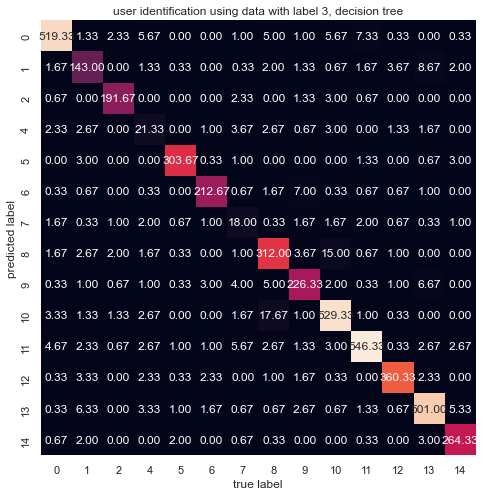

    Precision    Recall
0    0.945759  0.966475
1    0.857800  0.841498
2    0.960078  0.960121
4    0.536283  0.483720
5    0.970320  0.980693
6    0.941183  0.953613
7    0.559644  0.449158
8    0.913143  0.889398
9    0.899132  0.906298
10   0.945991  0.937455
11   0.946864  0.969278
12   0.962759  0.972942
13   0.953112  0.948813
14   0.967249  0.948722
accuracy      0.936503


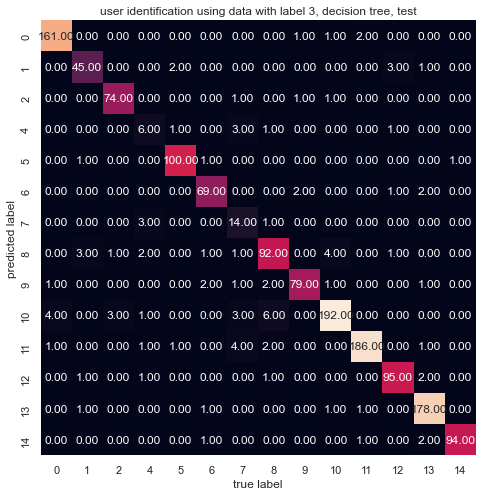

    Precision    Recall
0    0.975758  0.964072
1    0.882353  0.882353
2    0.961039  0.948718
4    0.500000  0.428571
5    0.970874  0.961538
6    0.932432  0.920000
7    0.777778  0.518519
8    0.876190  0.876190
9    0.908046  0.951807
10   0.918660  0.960000
11   0.948980  0.978947
12   0.950000  0.940594
13   0.978022  0.951872
14   0.959184  0.989474
accuracy      0.937712


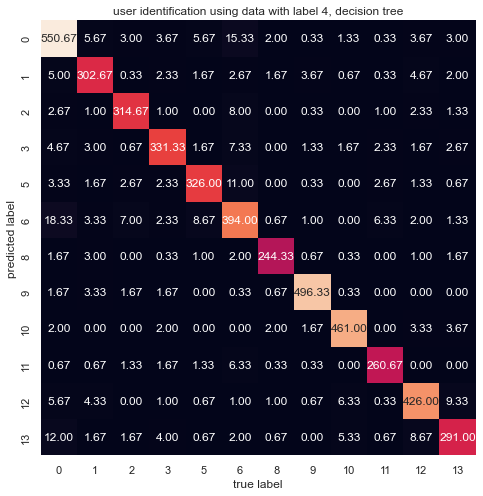

    Precision    Recall
0    0.925921  0.905155
1    0.923563  0.915613
2    0.946670  0.945178
3    0.925003  0.936765
5    0.925654  0.938748
6    0.885782  0.875572
8    0.954318  0.964295
9    0.980978  0.979442
10   0.969189  0.966525
11   0.954112  0.949157
12   0.933509  0.937210
13   0.887940  0.918617
accuracy      0.934760


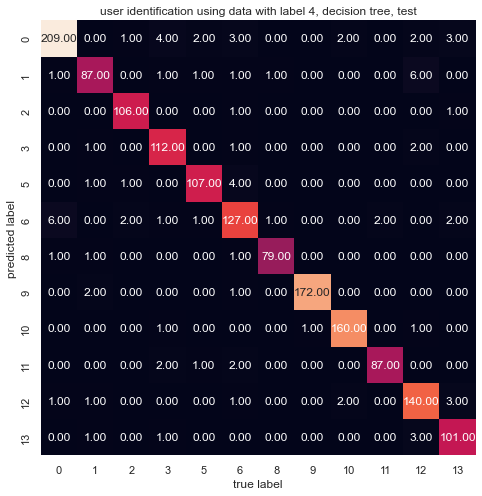

    Precision    Recall
0    0.924779  0.958716
1    0.887755  0.925532
2    0.981481  0.963636
3    0.965517  0.918033
5    0.946903  0.955357
6    0.894366  0.894366
8    0.963415  0.975309
9    0.982857  0.994220
10   0.981595  0.975610
11   0.945652  0.977528
12   0.945946  0.909091
13   0.952830  0.918182
accuracy      0.947737


In [28]:
# user identification
for i in range(0, 5):
    kf = KFold(n_splits=3)
    # print(np.unique(users_per_class[i]))
    model = tree.DecisionTreeClassifier()
    precision = []
    recall = []
    accuracy = []
    mat = []
    
    for train_index, validate_index in kf.split(datas_per_class_for_train[i]):
        train_datas, validate_datas = datas_per_class_for_train[i][train_index], datas_per_class_for_train[i][validate_index]
        train_labels, validate_labels = users_per_class_for_train[i][train_index], users_per_class_for_train[i][validate_index]

        # num = 0
        # for j in range(validate_labels.shape[0]):
        #     if(validate_labels[j]==4):
        #         num+=1
        # print(num)
        
        train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)
    

    precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

    plt.figure(figsize=(8,8))
    if i==4: 
        plot_confusion_matrix(mat, 'user identification using data with label 4, decision tree', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        plt.show()

        # # test
        # mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
        # plot_confusion_matrix(mat, 'test user identification using data with label 4, knn: k=5', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        # plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    else:
        plot_confusion_matrix(mat, 'user identification using data with label '+str(i)+', decision tree', [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    plt.show()

    if i==4:
        plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    else: 
        plot_performance(precision, recall, accuracy, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

    # test
    plt.figure(figsize=(8,8))
    if i==4: 
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        plot_confusion_matrix(mat, 'user identification using data with label 4, decision tree, test', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    elif i==0:
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        
        plot_confusion_matrix(mat, 'user identification using data with label 0, decision tree, test', [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

    else:
        
    
        
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        
        plot_confusion_matrix(mat, 'user identification using data with label '+str(i)+', decision tree, test', [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\WenXuan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


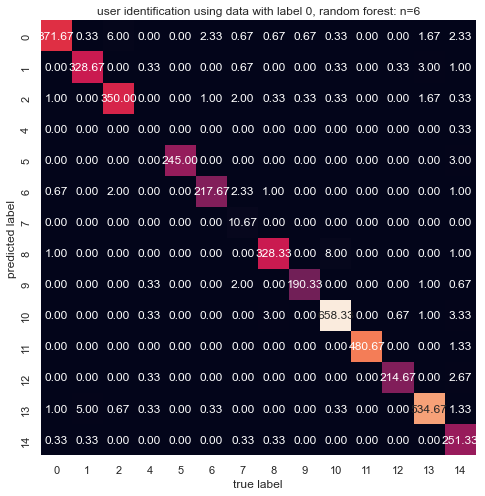

    Precision    Recall
0    0.961395  0.989289
1    0.983124  0.983066
2    0.980434  0.976233
4    0.000000  0.000000
5    0.987017  1.000000
6    0.968975  0.983583
7    1.000000  0.569288
8    0.970763  0.984210
9    0.979283  0.994687
10   0.987775  0.986065
11   0.997235  1.000000
12   0.986269  0.995362
13   0.983356  0.984486
14   0.994683  0.932010
accuracy      0.982382


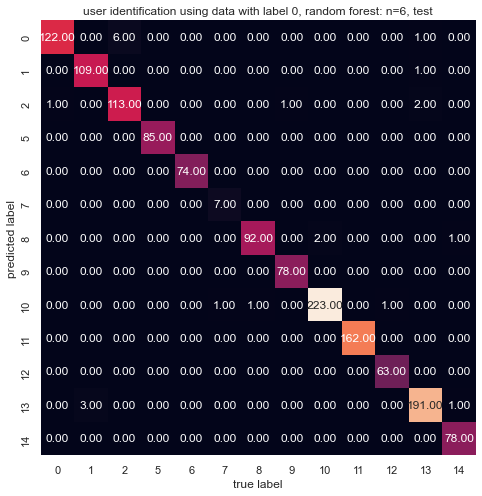

    Precision    Recall
0    0.945736  0.991870
1    0.990909  0.973214
2    0.965812  0.949580
5    1.000000  1.000000
6    1.000000  1.000000
7    1.000000  0.875000
8    0.968421  0.989247
9    1.000000  0.987342
10   0.986726  0.991111
11   1.000000  1.000000
12   1.000000  0.984375
13   0.979487  0.979487
14   1.000000  0.975000
accuracy      0.984496


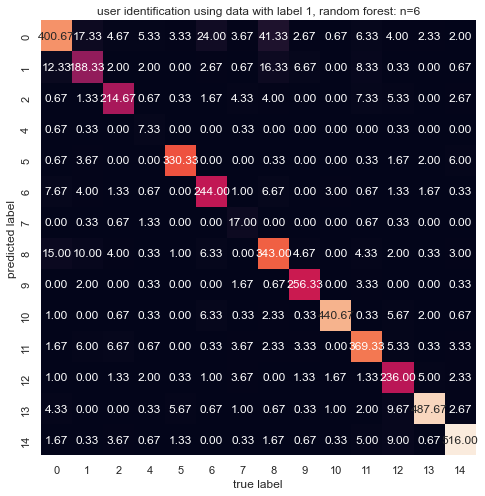

    Precision    Recall
0    0.772339  0.895425
1    0.783130  0.805579
2    0.881186  0.894438
4    0.841270  0.356683
5    0.957317  0.965223
6    0.895951  0.850790
7    0.848214  0.453260
8    0.871007  0.817802
9    0.968874  0.927936
10   0.956719  0.985037
11   0.916656  0.901780
12   0.918409  0.840048
13   0.944557  0.971316
14   0.953284  0.955648
accuracy      0.903307


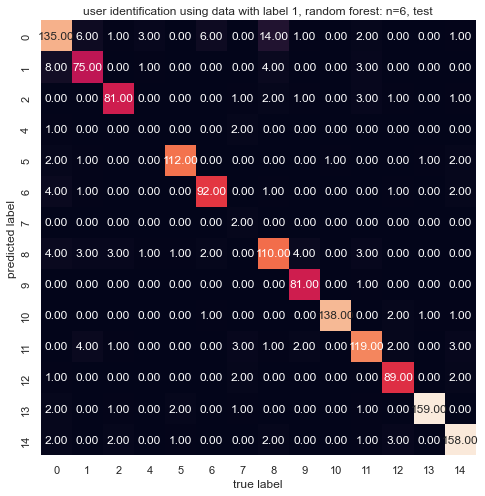

    Precision    Recall
0    0.798817  0.849057
1    0.824176  0.833333
2    0.900000  0.910112
4    0.000000  0.000000
5    0.941176  0.965517
6    0.910891  0.910891
7    1.000000  0.181818
8    0.839695  0.820896
9    0.987805  0.910112
10   0.965035  0.992806
11   0.881481  0.894737
12   0.946809  0.908163
13   0.957831  0.987578
14   0.934911  0.929412
accuracy      0.903679


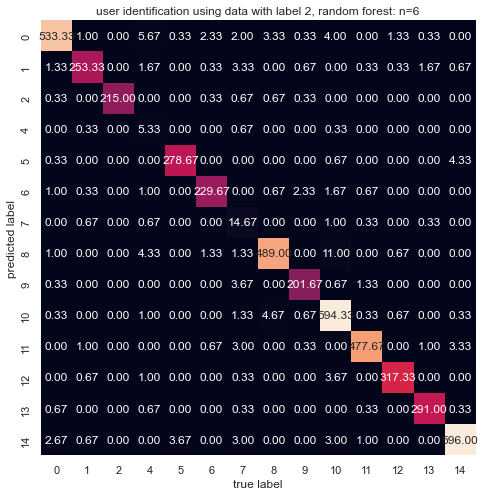

    Precision    Recall
0    0.962485  0.985119
1    0.961018  0.981910
2    0.988916  1.000000
4    0.878788  0.258745
5    0.981139  0.985913
6    0.968963  0.979224
7    0.834069  0.427171
8    0.961424  0.981328
9    0.970996  0.977208
10   0.984626  0.958053
11   0.981049  0.991065
12   0.982320  0.990516
13   0.991854  0.989013
14   0.977170  0.985234
accuracy      0.974642


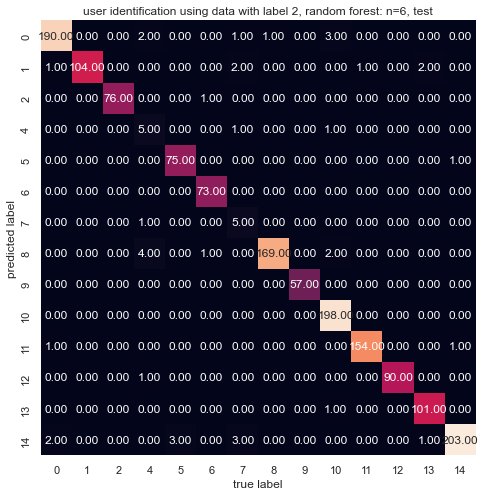

    Precision    Recall
0    0.964467  0.979381
1    0.945455  1.000000
2    0.987013  1.000000
4    0.714286  0.384615
5    0.986842  0.961538
6    1.000000  0.973333
7    0.833333  0.416667
8    0.960227  0.994118
9    1.000000  1.000000
10   1.000000  0.965854
11   0.987179  0.993548
12   0.989011  1.000000
13   0.990196  0.971154
14   0.957547  0.990244
accuracy      0.975293


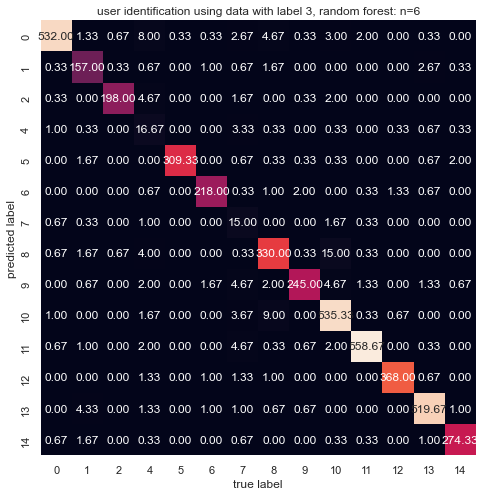

    Precision    Recall
0    0.957450  0.990077
1    0.953205  0.923870
2    0.956764  0.991649
4    0.713164  0.374774
5    0.981134  0.998925
6    0.971865  0.977575
7    0.778932  0.358249
8    0.935340  0.939903
9    0.928354  0.981535
10   0.970219  0.947754
11   0.979547  0.991129
12   0.985701  0.993676
13   0.981107  0.984190
14   0.982053  0.984416
accuracy      0.965318


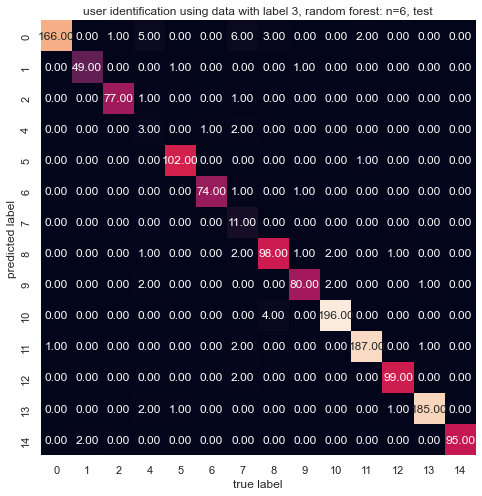

    Precision    Recall
0    0.907104  0.994012
1    0.960784  0.960784
2    0.974684  0.987179
4    0.500000  0.214286
5    0.990291  0.980769
6    0.973684  0.986667
7    1.000000  0.407407
8    0.933333  0.933333
9    0.941176  0.963855
10   0.980000  0.980000
11   0.979058  0.984211
12   0.980198  0.980198
13   0.978836  0.989305
14   0.979381  1.000000
accuracy      0.962762


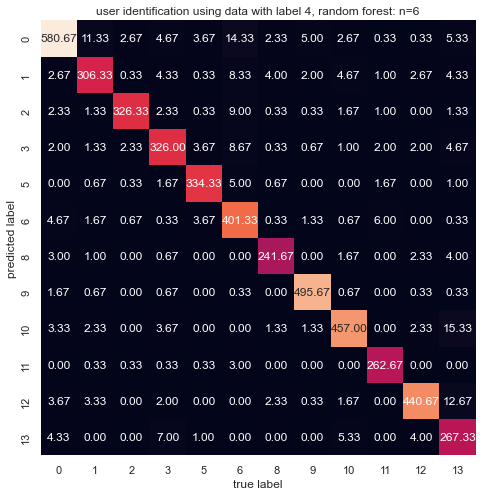

    Precision    Recall
0    0.916768  0.954646
1    0.898526  0.927283
2    0.942203  0.980049
3    0.918974  0.921638
5    0.968371  0.963042
6    0.953306  0.891841
8    0.950689  0.953745
9    0.990778  0.978588
10   0.939064  0.958069
11   0.983952  0.956245
12   0.944661  0.969222
13   0.924833  0.844640
accuracy      0.943543


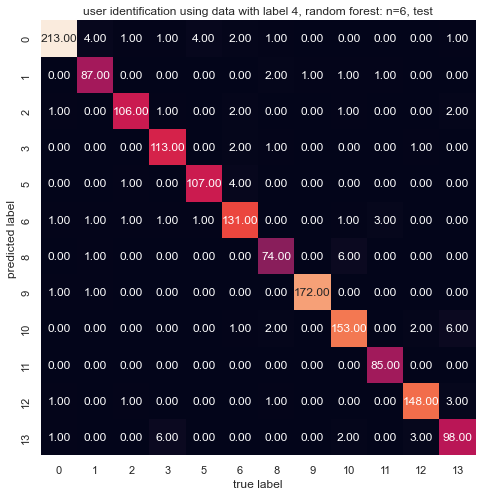

    Precision    Recall
0    0.938326  0.977064
1    0.945652  0.925532
2    0.938053  0.963636
3    0.965812  0.926230
5    0.955357  0.955357
6    0.935714  0.922535
8    0.913580  0.913580
9    0.988506  0.994220
10   0.932927  0.932927
11   1.000000  0.955056
12   0.961039  0.961039
13   0.890909  0.890909
accuracy      0.947737


In [29]:
# user identification
for i in range(0, 5):
    kf = KFold(n_splits=3)
    # print(np.unique(users_per_class[i]))
    model = RandomForestClassifier(n_estimators = 6, random_state = 0)
    precision = []
    recall = []
    accuracy = []
    mat = []
    
    for train_index, validate_index in kf.split(datas_per_class_for_train[i]):
        train_datas, validate_datas = datas_per_class_for_train[i][train_index], datas_per_class_for_train[i][validate_index]
        train_labels, validate_labels = users_per_class_for_train[i][train_index], users_per_class_for_train[i][validate_index]

        # num = 0
        # for j in range(validate_labels.shape[0]):
        #     if(validate_labels[j]==4):
        #         num+=1
        # print(num)
        
        train_and_validate(model, mat, precision, recall, accuracy, train_datas, train_labels, validate_datas, validate_labels)
    

    precision, recall, accuracy, mat = average_performance(precision, recall, accuracy, mat) 

    plt.figure(figsize=(8,8))
    if i==4: 
        plot_confusion_matrix(mat, 'user identification using data with label 4, random forest: n=6', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        plt.show()

        # # test
        # mat, precision, recall, accuracy = test(model, datas_for_test, labels_for_test)
        # plot_confusion_matrix(mat, 'test user identification using data with label 4, knn: k=5', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        # plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    else:
        plot_confusion_matrix(mat, 'user identification using data with label '+str(i)+', random forest: n=6', [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    plt.show()

    if i==4:
        plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    else: 
        plot_performance(precision, recall, accuracy, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])


    # test
    plt.figure(figsize=(8,8))
    if i==4: 
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        plot_confusion_matrix(mat, 'user identification using data with label 4, random forest: n=6, test', [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13])
    elif i==0:
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        
        plot_confusion_matrix(mat, 'user identification using data with label 0, random forest: n=6, test', [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

    else:
        
    
        
        mat, precision, recall, accuracy = test(model, datas_per_class_for_test[i], users_per_class_for_test[i])
        
        plot_confusion_matrix(mat, 'user identification using data with label '+str(i)+', random forest: n=6, test', [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
        plt.show()
        plot_performance(precision, recall, accuracy, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [19]:
# ax = plt.axes(projection='3d')
# ax.scatter3D(train_datas[0,0], train_datas[0,1], train_datas[0,2])
# ax.scatter3D(train_datas[0,3], train_datas[0,4], train_datas[0,5])
# ax.scatter3D(train_datas[0,6], train_datas[0,7], train_datas[0,8])
# ax.scatter3D(train_datas[0,9], train_datas[0,10], train_datas[0,11])